**Problem Statement:**

The objective of this analysis is to understand the purchasing behavior of different demographic segments during the Diwali festive season. Specifically, we aim to identify the key factors influencing sales in various product categories. By analyzing the sales data, we seek to uncover patterns and trends that can help retailers optimize their marketing strategies and inventory management for future Diwali seasons.

In [1]:
#import libraries
import pandas as pd;
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape') #to avoid encoding error use unicode escape.


In [3]:
# size of our dataset
df.shape

(11251, 15)

In [4]:
# first 25 rows
df.head(25)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
# structure of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Insights:**

There are 11251 rows and 15 columns,out which only two columns have Nan values.

From above  we get to know the datatypes of different columns

In [6]:
#Dropping Unnecessary columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [8]:
# checking for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

**Insights:**

There are Nan values only in Amount column.

In [9]:
df.shape

(11251, 13)

In [10]:
#Dropping the rows with Nan values
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
#Converting datatype of Amount
df['Amount']=df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [13]:
#Column names
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
#Renaming column names
df.rename(columns ={'Marital_Status':'Shaadi','Product_ID':'Pid'},inplace=True)

In [15]:
df

,User_ID,Cust_name,Pid,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [16]:
df.describe()#description of data in the dataframe.

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender


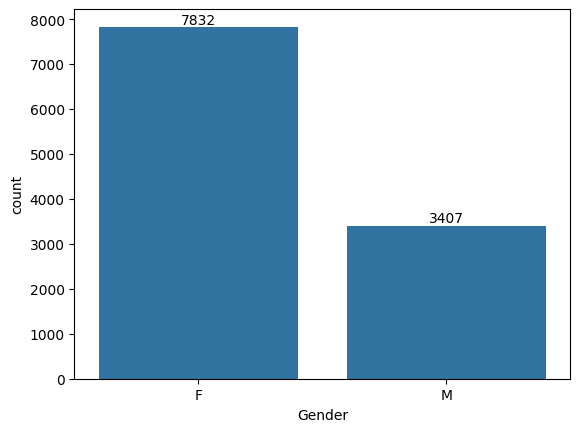

In [18]:
a=sns.countplot(df,x='Gender')
for bars in a.containers:
    a.bar_label(bars)


In [19]:
#grouping gender and calculating the sum of amount of each and sort them in decreasing order.
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)



,Gender,Amount
0,F,74335853
1,M,31913276


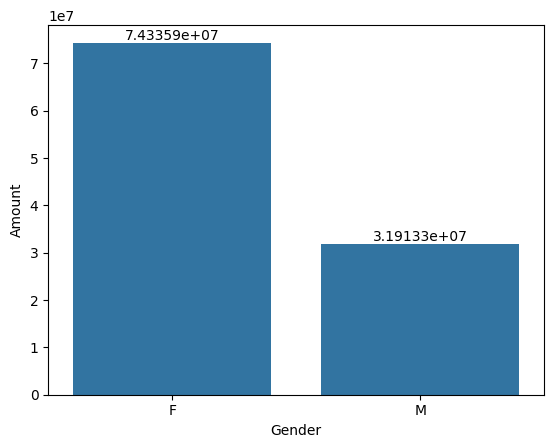

In [20]:
sales_data=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
a=sns.barplot(sales_data,x='Gender',y='Amount')
for bars in a.containers:
    a.bar_label(bars)

# Age

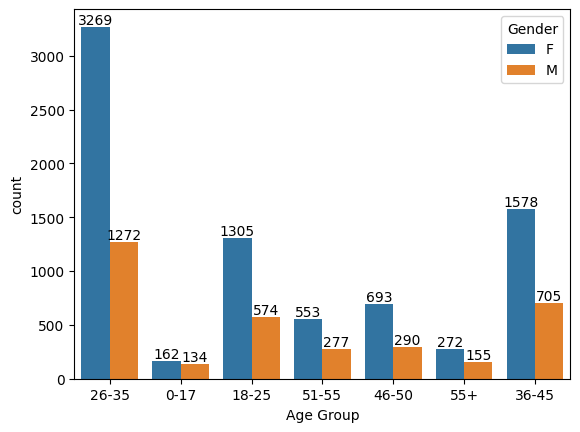

In [21]:
# determine the age group that are present in our dataset.
b=sns.countplot(df,x='Age Group',hue='Gender')
for bars in b.containers:
    b.bar_label(bars)


In [22]:
#next we need to identify which age group buys more diwali products.
age_sales=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

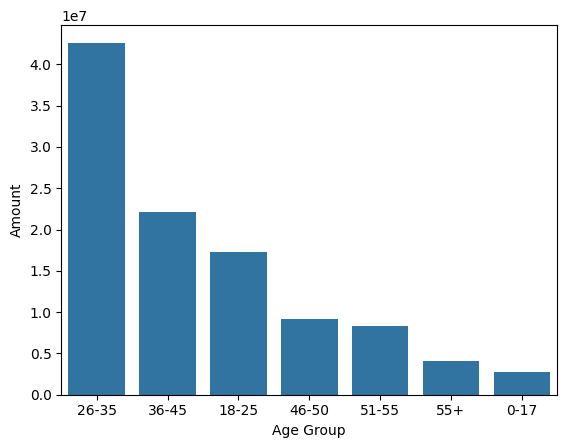

In [23]:
b=sns.barplot(age_sales,x='Age Group',y='Amount')


# State

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Pid', 'Gender', 'Age Group', 'Age', 'Shaadi',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

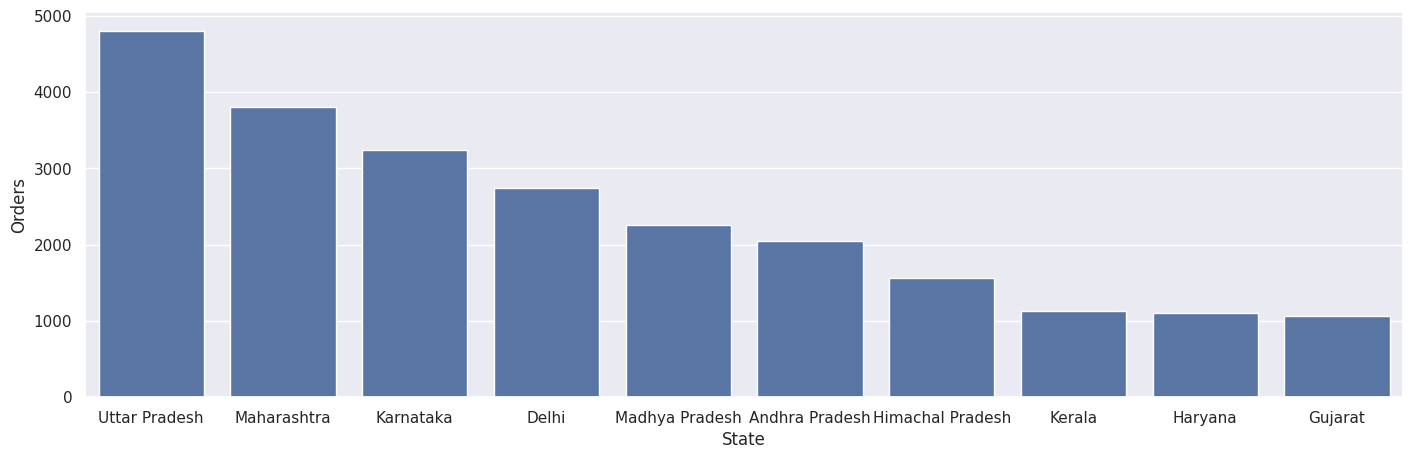

In [40]:
#total number of orders from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data=sales_state,x='State',y='Orders')


In [26]:
df.State.value_counts()

State
Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

<Axes: xlabel='State', ylabel='Amount'>

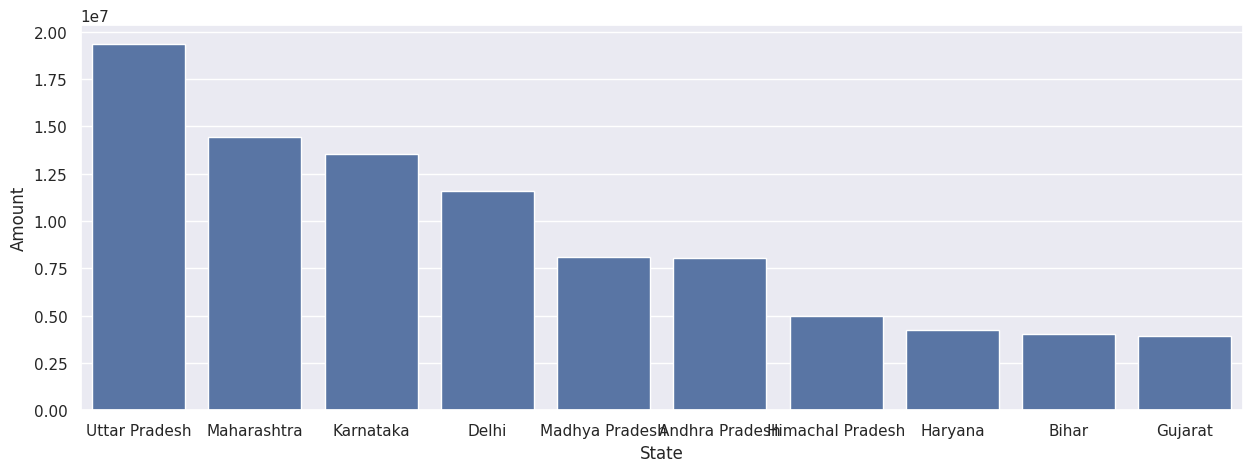

In [27]:
#total amount/sales from top 10 states:
sales_amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_amount,x='State',y='Amount')


**Insights:**

 From above graphs we can see that most of the orders,sales/amount are from UttarPradesh,Maharashtra and Karnataka respectively.

# Occupation

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Pid', 'Gender', 'Age Group', 'Age', 'Shaadi',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

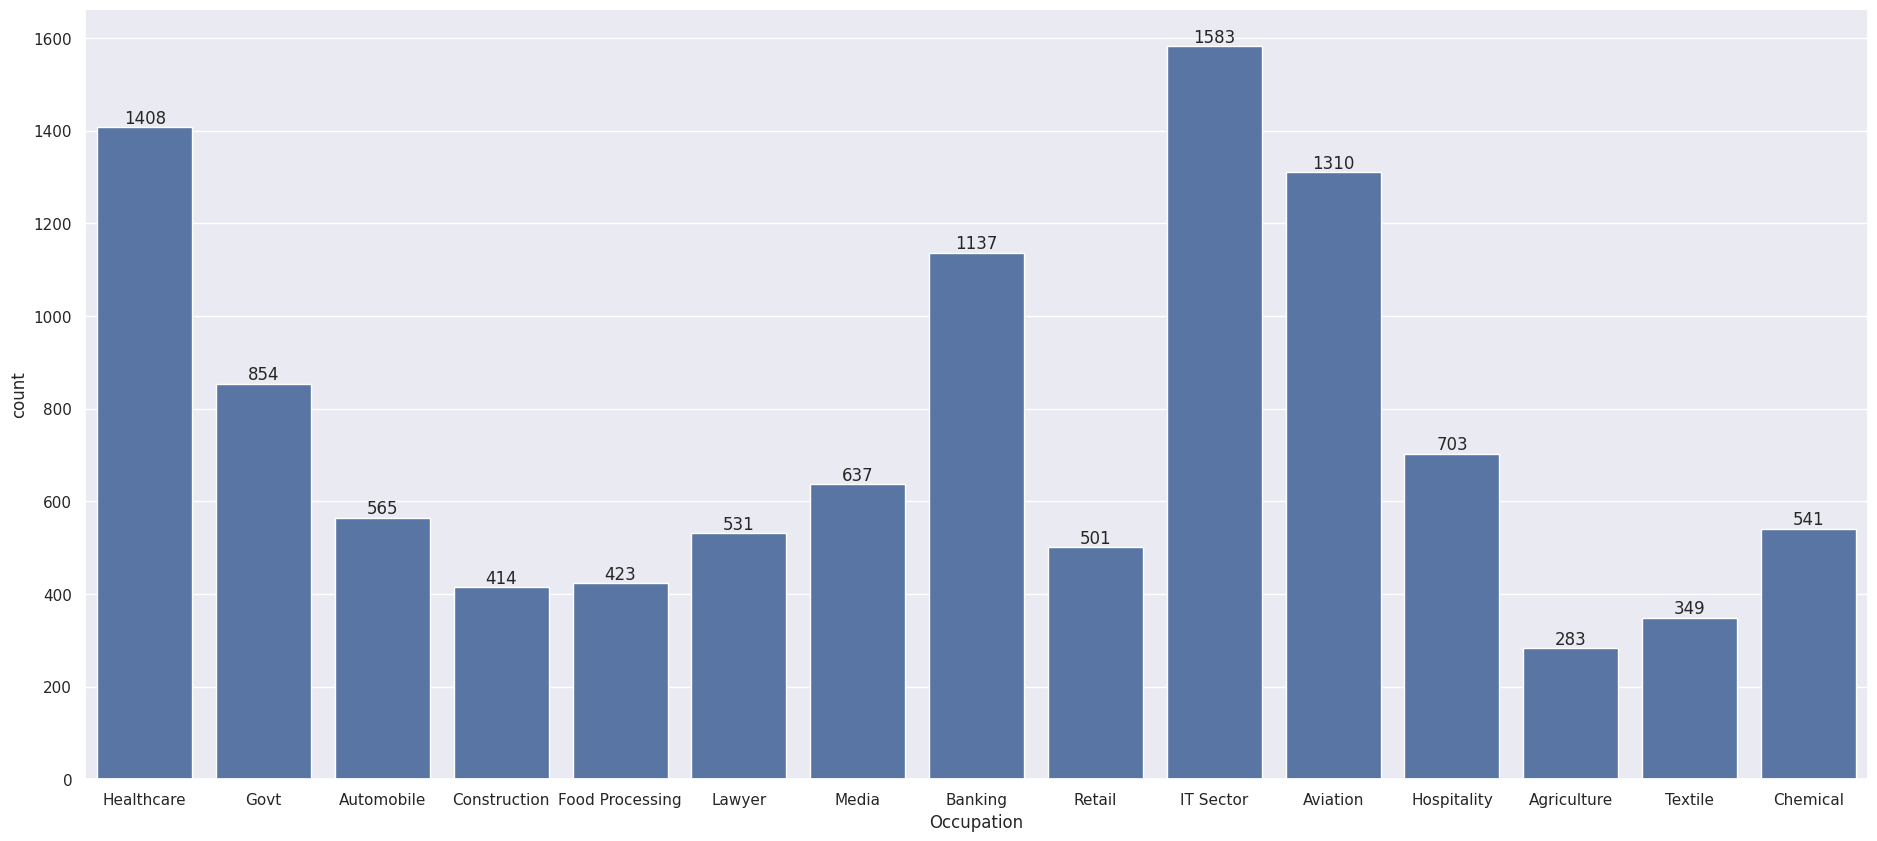

In [41]:
sns.set(rc={'figure.figsize':(23,10)})
a=sns.countplot(df,x='Occupation')

for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

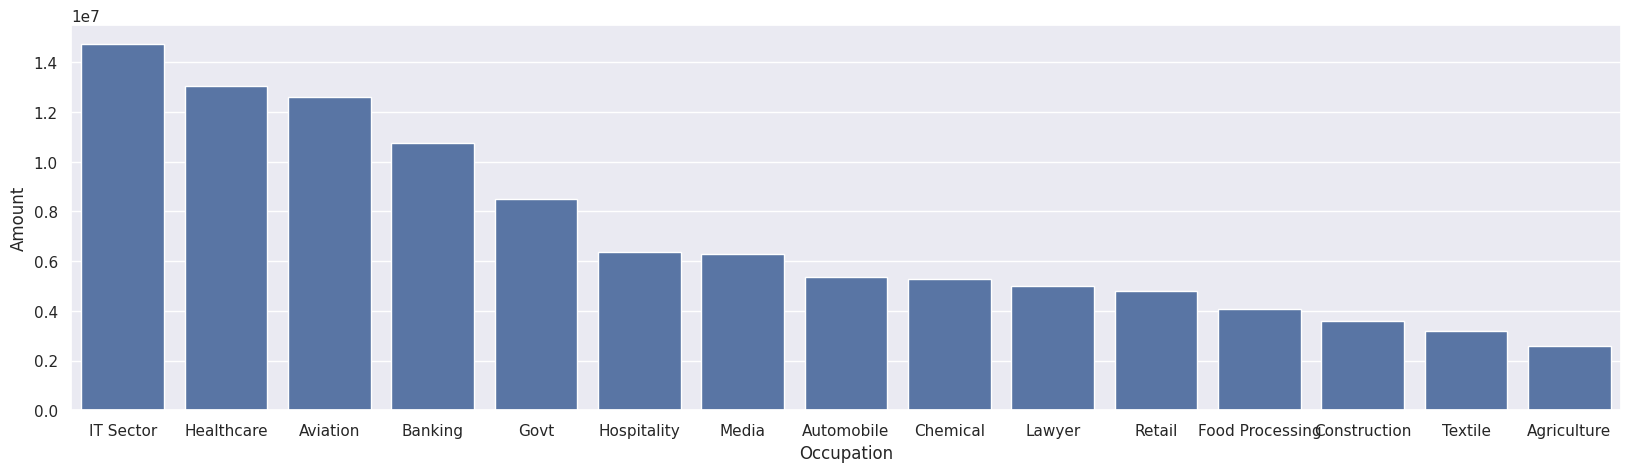

In [30]:
occupation_amount=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
occupation_amount
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=occupation_amount,x='Occupation',y='Amount')


# Marital status

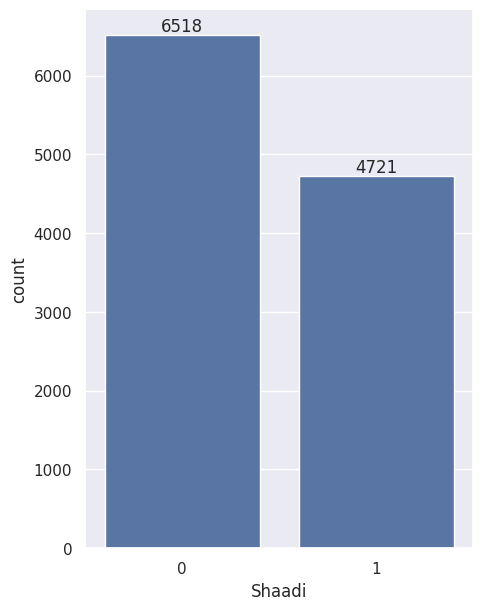

In [31]:
sns.set(rc={'figure.figsize':(5,7)})
a=sns.countplot(df,x='Shaadi')

for bars in a.containers:
    a.bar_label(bars)

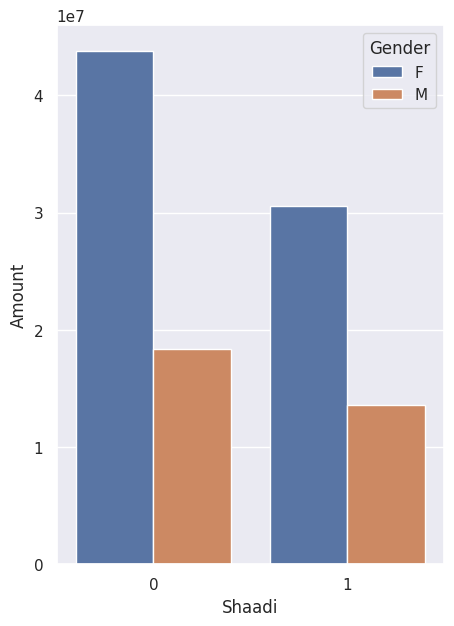

In [32]:
sns.set(rc={'figure.figsize':(5,7)})
sales_data=df.groupby(['Shaadi','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
a=sns.barplot(sales_data,x='Shaadi', y='Amount',hue='Gender')



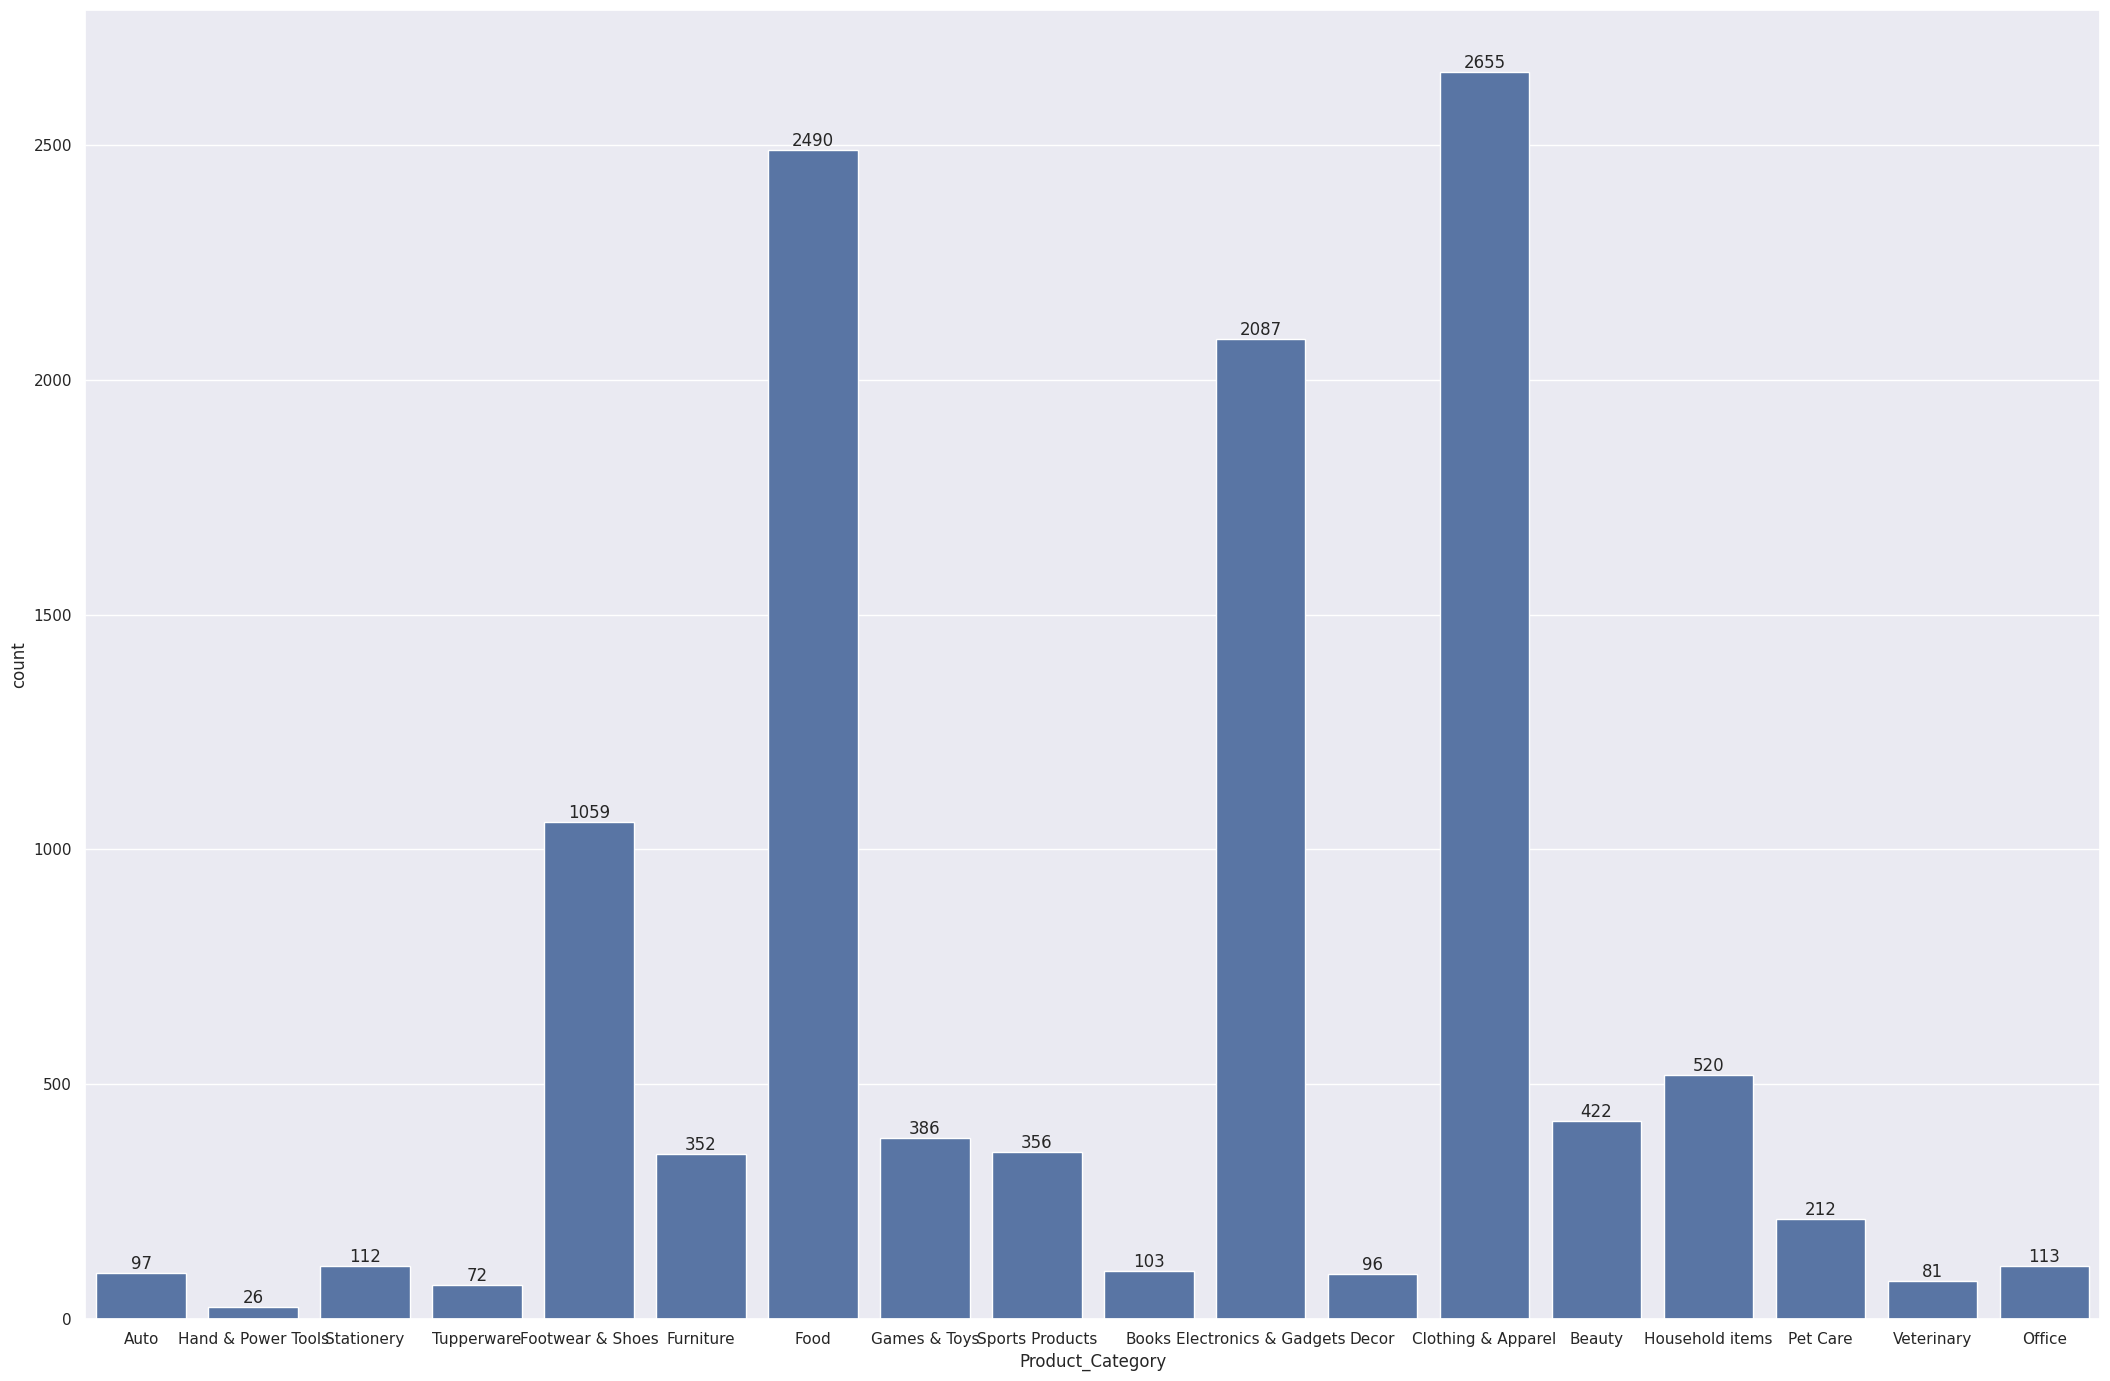

In [33]:
# Product_category:
sns.set(rc={'figure.figsize':(26,17)})
a=sns.countplot(df,x='Product_Category')

for bars in a.containers:
    a.bar_label(bars)


<Axes: xlabel='Product_Category', ylabel='Amount'>

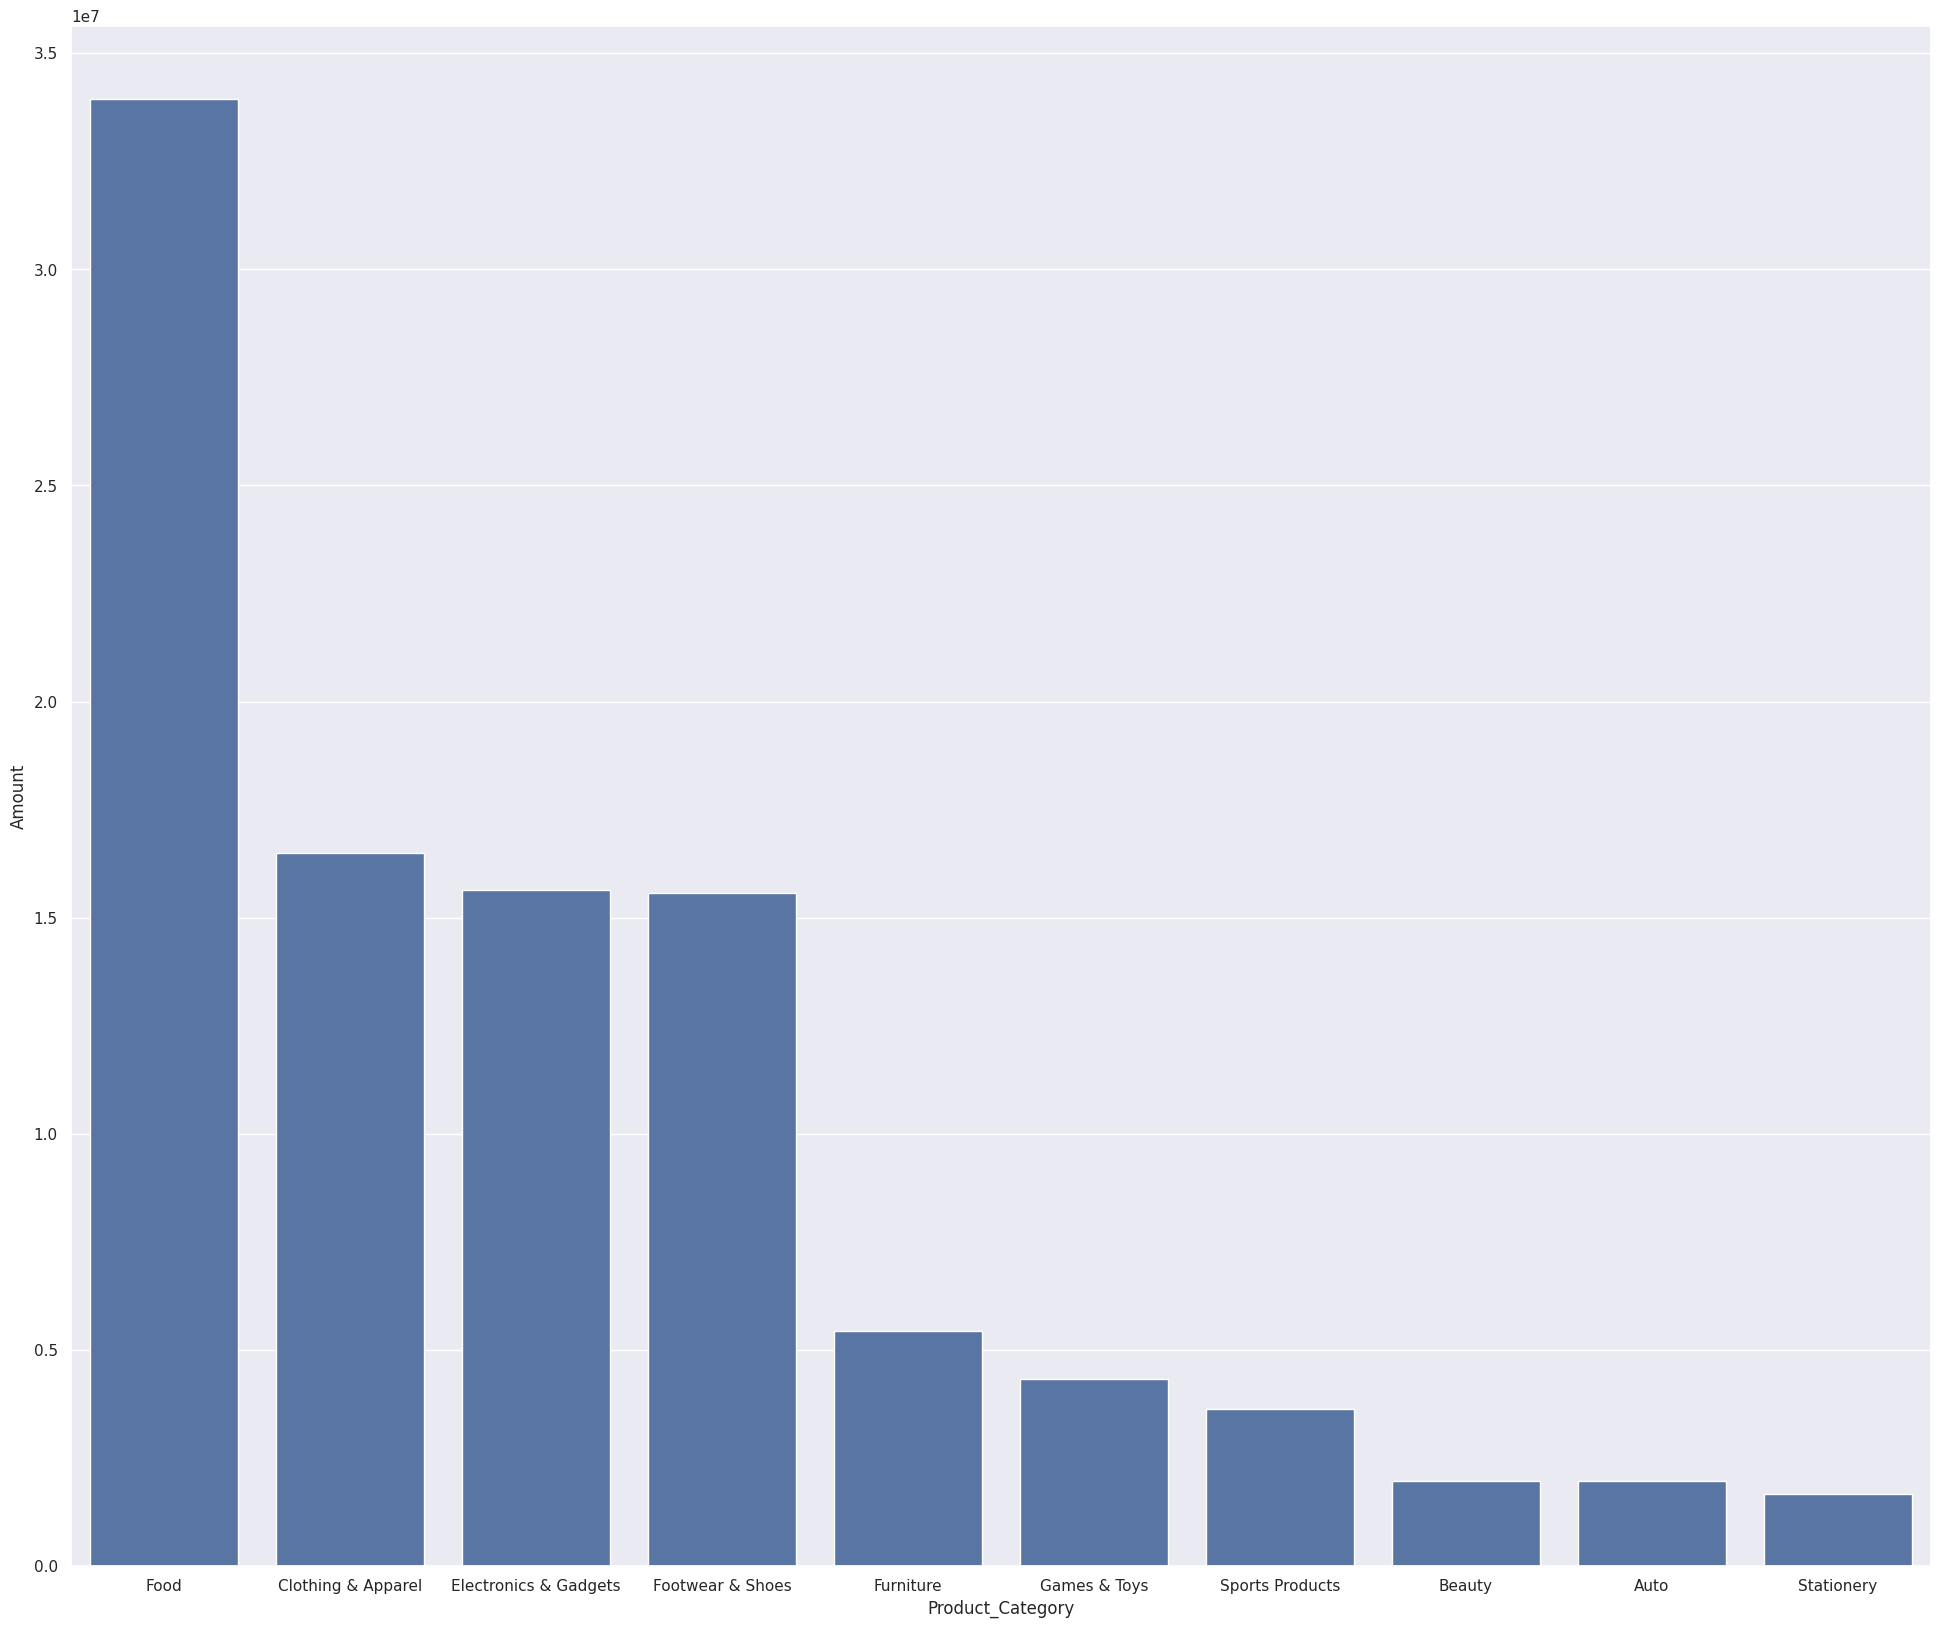

In [34]:
product_orders=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
product_orders
sns.set(rc={'figure.figsize':(24,20)})
sns.barplot(data=product_orders,x='Product_Category',y='Amount')


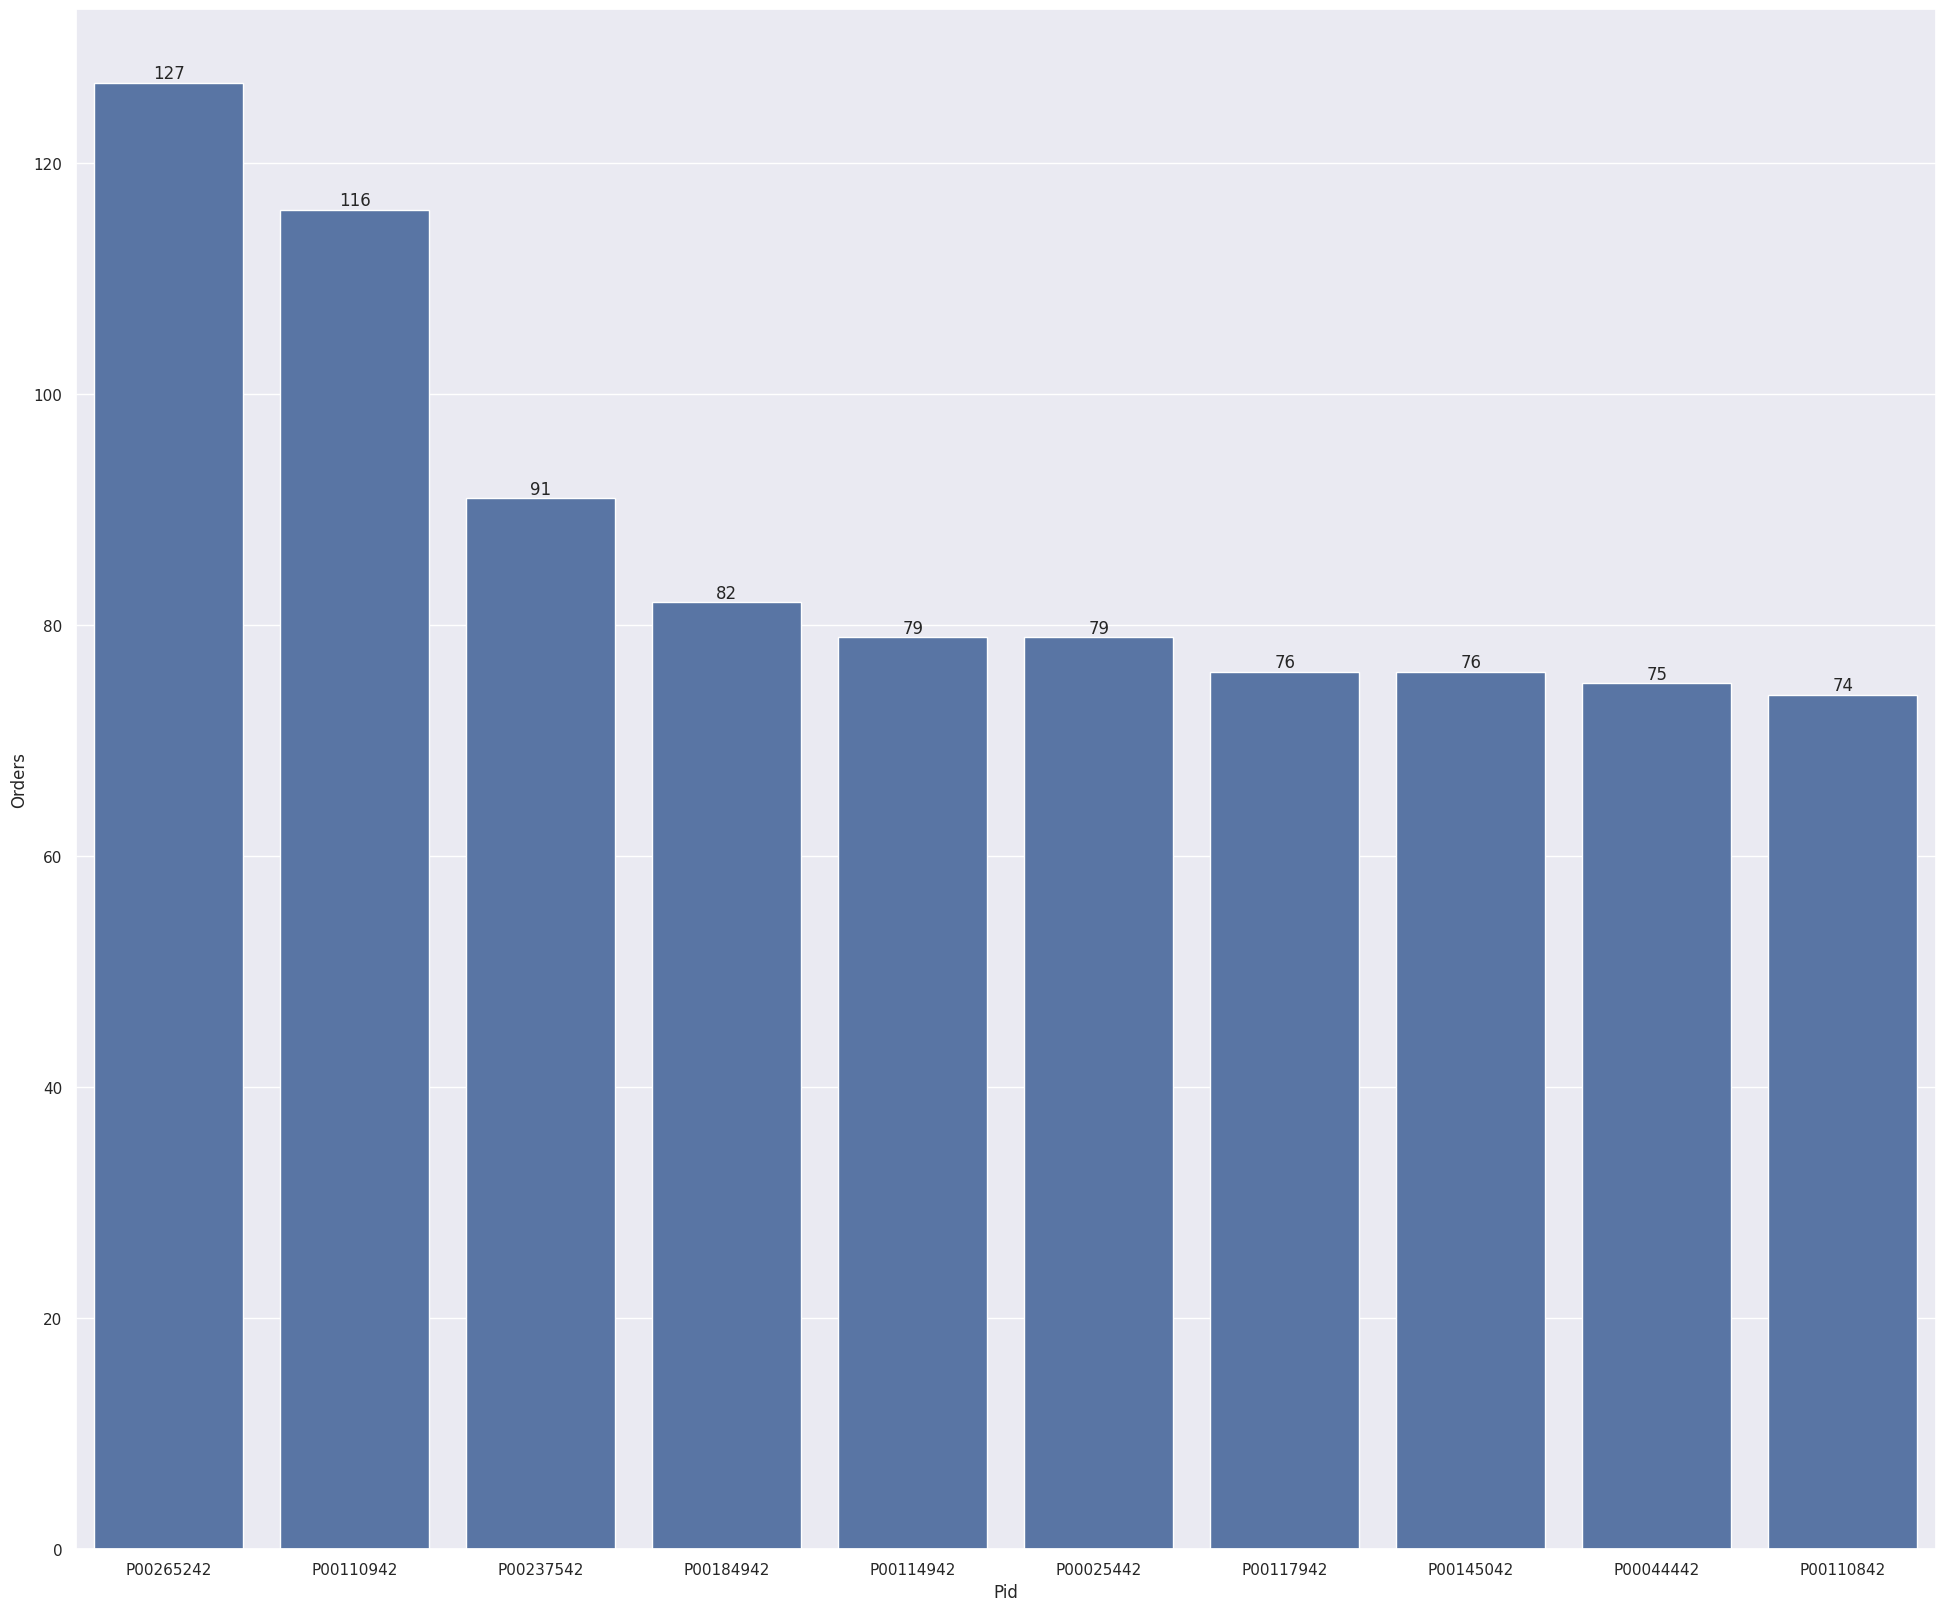

In [36]:
product_orders=df.groupby(['Pid'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(24,20)})
a=sns.barplot(data=product_orders,x='Pid',y='Orders')
for bars in a.containers:
    a.bar_label(bars)

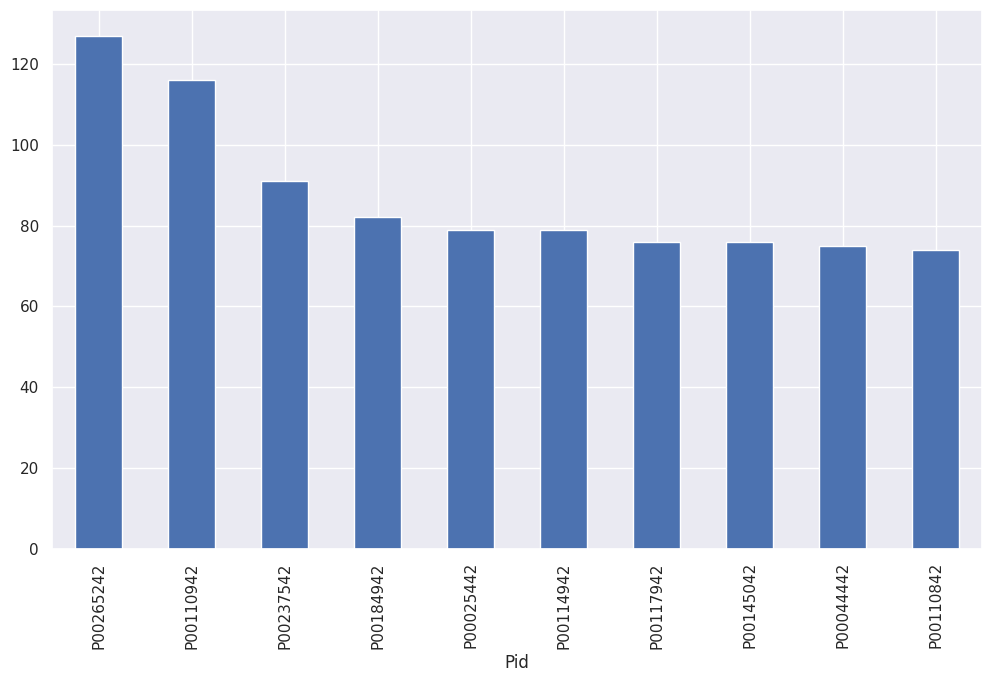

In [37]:
#top 10 selling products: same as above
fig1,ax1=plt.subplots(figsize=(12,7))
product_orders=df.groupby('Pid')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')


# Conclusion


Married Women of age between 26-35  years from uttarpradesh,Maharashtra and karnataka working in it ,healthcare and avaiation are more likely to buy products from food,clothing and electronics category.